<img src="https://raw.githubusercontent.com/crramirezma/AlgorithmsUN2020II/master/GaleShapleyIrving/imagenes/Matrimonio.png">


#Algoritmo de Gale–Shapley para la solución del problema del matrimonio perfecto

Cristian Daniel Ramirez Marin

Cc:1000832655

Usuario: crramirezma

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Python3 program for stable marriage problem 
  

  
# This function returns true if  
# woman 'w' prefers man 'm1' over man 'm' 
def wPrefersM1OverM(prefer, w, m, m1,N): 
      
    # Check if w prefers m over her  
    # current engagment m1 
    for i in range(N): 
          
        # If m1 comes before m in lisr of w,  
        # then w prefers her current engagement, 
        # don't do anything 
        if (prefer[w][i] == m1): 
            return True
  
        # If m cmes before m1 in w's list,  
        # then free her current engagement  
        # and engage her with m 
        if (prefer[w][i] == m): 
            return False
  
# Prints stable matching for N boys and N girls.  
# Boys are numbered as 0 to N-1.  
# Girls are numbereed as N to 2N-1. 
def stableMarriage(prefer,N): 
      
    # Stores partner of women. This is our output  
    # array that stores paing information.  
    # The value of wPartner[i] indicates the partner  
    # assigned to woman N+i. Note that the woman numbers  
    # between N and 2*N-1. The value -1 indicates  
    # that (N+i)'th woman is free 
    wPartner = [-1 for i in range(N)] 
  
    # An array to store availability of men.  
    # If mFree[i] is false, then man 'i' is free, 
    # otherwise engaged. 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
    #Contador de iteraciones
    k=0
    # While there are free men 
    while (freeCount > 0): 
          
        # Pick the first free man (we could pick any) 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
  
        # One by one go to all women according to  
        # m's preferences. Here m is the picked free man 
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
  
            # The woman of preference is free,  
            # w and m become partners (Note that  
            # the partnership maybe changed later).  
            # So we can say they are engaged not married 
            
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                # If w is not free 
                # Find current engagement of w 
                m1 = wPartner[w - N] 
  
                # If w prefers m over her current engagement m1, 
                # then break the engagement between w and m1 and 
                # engage m with w. 
                if (wPrefersM1OverM(prefer, w, m, m1,N) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
            k+=1
  
            # End of Else 
        # End of the for loop that goes  
        # to all women in m's list 
    # End of main while loop 
  
    # Print the solution 
    print("Woman ", " Man") 
    for i in range(N): 
        print(i + N, "\t", wPartner[i]) 

    #k:cantidad de iteraciones para resolver el caso
    #wPartner: lista de los datos de los matrimonios estables
    #arriba ejemplo de como imprimirlo
    
    return [k,wPartner]
# Driver Code 
#prefer = [[7, 5, 6, 4], [5, 4, 6, 7], 
#          [4, 5, 6, 7], [4, 5, 6, 7], 
#          [0, 1, 2, 3], [0, 1, 2, 3], 
#          [0, 1, 2, 3], [0, 1, 2, 3]] 
  
#stableMarriage(prefer) 
  
# This code is contributed by Mohit Kumar 

In [3]:
p=[[5, 4, 6, 7],
 [7, 6, 4, 5],
 [5, 6, 4, 7],
 [4, 5, 6, 7],
 [3, 1, 0, 2],
 [0, 3, 1, 2],
 [1, 2, 0, 3],
 [1, 2, 3, 0]]

print("Cantidad de iteraciones: ",stableMarriage(p,4)[0])

Woman   Man
4 	 3
5 	 0
6 	 2
7 	 1
Cantidad de iteraciones:  5


## Mejor y peor caso para el algoritmo del matrimonio perfecto

### Mejor caso

El mejor caso para el algoritmo del matrimonio perfecto es aquel en el que cada hombre tiene como maxima prioridad a la chica que lo tiene a el como maxima prioridad.
Para simular este caso, se creo la función "mejorOpcion", la cual recibe un entero n, y la cual retorna un arreglo de tamaño 2n el cual posee la caracteristica mencionada

In [4]:
def mejorOpcion(n):
  p=[]
  #llenando los datos de los hombre
  for i in range(n):
    r=[]
    for j in range(n):
      r.append((i+j)%n+n)
    p.append(r)

  #llenando para las mujeres
  for i in range(n):
    r=[]
    for j in range(n):
      r.append((i+j)%n)
    p.append(r)
  return p

mejorOpcion(4)

[[4, 5, 6, 7],
 [5, 6, 7, 4],
 [6, 7, 4, 5],
 [7, 4, 5, 6],
 [0, 1, 2, 3],
 [1, 2, 3, 0],
 [2, 3, 0, 1],
 [3, 0, 1, 2]]

In [5]:
n=4
p=mejorOpcion(n)
print("Cantidad de iteraciones: ",stableMarriage(p,n)[0])

Woman   Man
4 	 0
5 	 1
6 	 2
7 	 3
Cantidad de iteraciones:  4


In [6]:
n=40
p=mejorOpcion(n)
print("Cantidad de iteraciones: ",stableMarriage(p,n)[0])

Woman   Man
40 	 0
41 	 1
42 	 2
43 	 3
44 	 4
45 	 5
46 	 6
47 	 7
48 	 8
49 	 9
50 	 10
51 	 11
52 	 12
53 	 13
54 	 14
55 	 15
56 	 16
57 	 17
58 	 18
59 	 19
60 	 20
61 	 21
62 	 22
63 	 23
64 	 24
65 	 25
66 	 26
67 	 27
68 	 28
69 	 29
70 	 30
71 	 31
72 	 32
73 	 33
74 	 34
75 	 35
76 	 36
77 	 37
78 	 38
79 	 39
Cantidad de iteraciones:  40


En el mejor de los casos, la eficiencia del algoritmo del matrimonio perfecto es de O(n)

### Peor caso

Al igual que para el mejor caso, el peor caso, el cual se encuentra comprobado en https://www.mdpi.com/1999-4893/6/2/371/htm, se creo una función "peorCaso" el cual recibe un n y devuelve una lista de tamaño 2n con la combinación para el peor caso del matrimonio estable

In [7]:
# Generando el peor caso del matrimonio estable, generalización del propuesto en https://www.mdpi.com/1999-4893/6/2/371/htm 

def peorCaso(n):
  #p: lista que guardara los datos que se retornaran al final
  p=[]

  #llenando los datos de los hombre
  for i in range(n):
    r=[]
    for j in range(n-1):
      r.append((i+j)%(n-1)+n)
    r.append(2*n-1)
    p.append(r)

  #llenando para las mujeres
  for i in range(n):
    r=[]
    for j in range(n):
      r.append((i+j+1)%(n))
    
    p.append(r)
  return p

peorCaso(5)


[[5, 6, 7, 8, 9],
 [6, 7, 8, 5, 9],
 [7, 8, 5, 6, 9],
 [8, 5, 6, 7, 9],
 [5, 6, 7, 8, 9],
 [1, 2, 3, 4, 0],
 [2, 3, 4, 0, 1],
 [3, 4, 0, 1, 2],
 [4, 0, 1, 2, 3],
 [0, 1, 2, 3, 4]]

In [8]:
#corriendo el algoritmo para n=4
n=4
p=peorCaso(n) 
print("Cantidad de iteraciones: ",stableMarriage(p,n)[0])


Woman   Man
4 	 1
5 	 2
6 	 3
7 	 0
Cantidad de iteraciones:  28


In [9]:
#corriendo el algoritmo para n=40
n=40
p=peorCaso(n) 
print("Cantidad de iteraciones: ",stableMarriage(p,n)[0])

Woman   Man
40 	 1
41 	 2
42 	 3
43 	 4
44 	 5
45 	 6
46 	 7
47 	 8
48 	 9
49 	 10
50 	 11
51 	 12
52 	 13
53 	 14
54 	 15
55 	 16
56 	 17
57 	 18
58 	 19
59 	 20
60 	 21
61 	 22
62 	 23
63 	 24
64 	 25
65 	 26
66 	 27
67 	 28
68 	 29
69 	 30
70 	 31
71 	 32
72 	 33
73 	 34
74 	 35
75 	 36
76 	 37
77 	 38
78 	 39
79 	 0
Cantidad de iteraciones:  31240


## Corriendo el algoritmo 100 veces

Rehacemos la función del matrimonio perfecto pero en este caso sin imprimir los datos del matrimonio en cada caso, ya que solo se necesitan los numeros de iteraciones

In [10]:
# Python3 program for stable marriage problem 
  

  
# This function returns true if  
# woman 'w' prefers man 'm1' over man 'm' 
def wPrefersM1OverM(prefer, w, m, m1,N): 
      
    # Check if w prefers m over her  
    # current engagment m1 
    for i in range(N): 
          
        # If m1 comes before m in lisr of w,  
        # then w prefers her current engagement, 
        # don't do anything 
        if (prefer[w][i] == m1): 
            return True
  
        # If m cmes before m1 in w's list,  
        # then free her current engagement  
        # and engage her with m 
        if (prefer[w][i] == m): 
            return False
  
# Prints stable matching for N boys and N girls.  
# Boys are numbered as 0 to N-1.  
# Girls are numbereed as N to 2N-1. 
def stableMarriageSinPrint(prefer,N): 
      
    # Stores partner of women. This is our output  
    # array that stores paing information.  
    # The value of wPartner[i] indicates the partner  
    # assigned to woman N+i. Note that the woman numbers  
    # between N and 2*N-1. The value -1 indicates  
    # that (N+i)'th woman is free 
    wPartner = [-1 for i in range(N)] 
  
    # An array to store availability of men.  
    # If mFree[i] is false, then man 'i' is free, 
    # otherwise engaged. 
    mFree = [False for i in range(N)] 
  
    freeCount = N 
    #Contador de iteraciones
    k=0
    # While there are free men 
    while (freeCount > 0): 
          
        # Pick the first free man (we could pick any) 
        m = 0
        while (m < N): 
            if (mFree[m] == False): 
                break
            m += 1
  
        # One by one go to all women according to  
        # m's preferences. Here m is the picked free man 
        i = 0
        while i < N and mFree[m] == False: 
            w = prefer[m][i] 
  
            # The woman of preference is free,  
            # w and m become partners (Note that  
            # the partnership maybe changed later).  
            # So we can say they are engaged not married 
            
            if (wPartner[w - N] == -1): 
                wPartner[w - N] = m 
                mFree[m] = True
                freeCount -= 1
  
            else:  
                  
                # If w is not free 
                # Find current engagement of w 
                m1 = wPartner[w - N] 
  
                # If w prefers m over her current engagement m1, 
                # then break the engagement between w and m1 and 
                # engage m with w. 
                if (wPrefersM1OverM(prefer, w, m, m1,N) == False): 
                    wPartner[w - N] = m 
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
            k+=1
  
            # End of Else 
        # End of the for loop that goes  
        # to all women in m's list 
    # End of main while loop 
  
    # Print the solution 
    #print("Woman ", " Man") 
    #for i in range(N): 
     #   print(i + N, "\t", wPartner[i]) 

    #k:cantidad de iteraciones para resolver el caso
    #wPartner: lista de los datos de los matrimonios estables
    #arriba ejemplo de como imprimirlo
    
    return [k,wPartner]
# Driver Code 
#prefer = [[7, 5, 6, 4], [5, 4, 6, 7], 
#          [4, 5, 6, 7], [4, 5, 6, 7], 
#          [0, 1, 2, 3], [0, 1, 2, 3], 
#          [0, 1, 2, 3], [0, 1, 2, 3]] 
  
#stableMarriage(prefer) 
  
# This code is contributed by Mohit Kumar 

In [11]:
#genera una lista aleatoria desde first hasta last
def lista_aleatoria(first,last):
  lista=[]
  #calcular a partir del first y el last el tamaño de la lista
  while(len(lista)<(last-first+1)):
    k=random.randint(first,last);
    #si el valor no esta en la lista, lo agrega
    if k not in lista:
      lista.append(k)
  
  return lista;



#Generar lista de preferencias aleatorias dado un valor de n
#n mujeres y n hombres
def preferidos(n):
  prefer=[]


  #primero la lista de preferidos para los hombres
  #los hombres se encuentran desde la posición n hasta el final dentro de la lista 
  for i in range(n):
    prefer.append(lista_aleatoria(n,2*n-1))

  #luego las preferencias de las mujeres
  #las mujeres ocupan los primeros puestos de 0 a n-1 en la lista
  for i in range(n):
    prefer.append(lista_aleatoria(0,n-1))

  return prefer;

In [12]:
x=[]
y=np.array([])

#correr un for 100 veces
for i in range(100):
  #generando un valor aleatorio para n, este valor se usara para encontrar el stableMarriage
  N=random.randint(4,40)
  x.append(N)
  y=np.append(y,stableMarriageSinPrint(preferidos(N),N)[0])

In [13]:
#Minimo, maximo y promedio de los datos
print("El minimo numero de iteraciones fue de: ",np.min(y))
print("El maximo numero de iteraciones fue de: ",np.max(y))
print("El valor promedio de iteraciones para listas de tamaño n, 4<=n<=40 es: ",np.average(y))

El minimo numero de iteraciones fue de:  6.0
El maximo numero de iteraciones fue de:  489.0
El valor promedio de iteraciones para listas de tamaño n, 4<=n<=40 es:  109.89


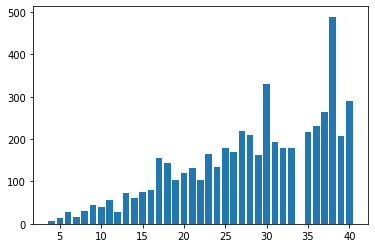

In [14]:
#Graficando los datos
plt.bar(x,y)
plt.show()

Podemos ver en la grafica que, se sigue una tendencia a un mayor tiempo, aunque dado que son listas aleatorias, la posibilidad de que una lista mas pequeña tarde mas que una lista mas grande existe, y eso lo podemos ver con los datos no uniformes en el grafico

##Referencias
- Stable Marriage Problem:https://www.geeksforgeeks.org/stable-marriage-problem/
- Improving Man-Optimal Stable Matchings by Minimum Change of Preference Lists: https://www.mdpi.com/1999-4893/6/2/371/htm